In [1]:
gold <- read.csv("../Data_Project/target_금종가_factor포함 .csv")

In [2]:
head(gold)
tail(gold)

금종가 달러유로종가 달러유로격차 브렌트유종가 브렌트유격차 크루드종가
1 283.2  0.97         0.04         25.97        4.07         27.64     
2 292.4  0.96         0.06         28.09        3.05         30.43     
3 278.4  0.96         0.04         24.77        7.70         26.90     
4 273.1  0.91         0.04         23.89        3.92         25.74     
5 271.7  0.94         0.04         28.31        5.47         29.01     
6 290.1  0.95         0.02         30.57        4.12         32.50     
  미국10년국채종가 외환보유액 나스닥종가 나스닥격차 ... X5크루드종가_상하
1 6.662            768        3940.35     592.06    ... 0                
2 6.409            797        4696.69     786.62    ... 1                
3 6.002            837        4572.83     776.83    ... 0                
4 6.218            846        3860.66    1345.80    ... 0                
5 6.285            868        3400.91     939.72    ... 1                
6 6.027            902        3966.11     672.82    ... 1                
  X3브렌트유종가_상하 X2달러유로종가_상하 X2달러유로격차_상하 X13SNP종가_상하
1 0                   0                   0                   0              
2 1                   0                   1                   0              
3 0                   0                   0                   1              
4 0                   0                   0                   0              
5 1                   1                   0                   0              
6 1                   1                   0                   1              
  X13SNP격차_상하 X12코스피종가_상하 X11상하이종가_상하 X10다우종가_상하
1 0               0                  0                  0               
2 0               0                  1                  0               
3 1               1                  1                  1               
4 0               0                  1                  0               
5 0               1                  1                  0               
6 0               1                  1                  0               
  X10다우격차_상하
1 0               
2 1               
3 1               
4 0               
5 0               
6 0

금종가 달러유로종가 달러유로격차 브렌트유종가 브렌트유격차 크루드종가
259 1823.8 1.19         0.04         76.33        10.40        73.95     
260 1825.1 1.18         0.06         72.99        10.79        68.50     
261 1762.3 1.16         0.06         78.52        10.33        75.03     
262 1790.7 1.16         0.05         84.38         9.15        83.57     
263 1781.9 1.13         0.04         70.57        15.28        66.18     
264 1835.9 1.14         0.04         77.78        14.45        75.21     
    미국10년국채종가 외환보유액 나스닥종가 나스닥격차 ... X5크루드종가_상하
259 1.226            4587       14672.68    684.99    ... 1                
260 1.307            4639       15259.24    864.92    ... 0                
261 1.492            4640       14448.58    959.14    ... 1                
262 1.561            4692       15498.39   1322.43    ... 1                
263 1.456            4639       15537.69    760.84    ... 0                
264 1.512            4631       15644.97   1041.43    ... 1                
    X3브렌트유종가_상하 X2달러유로종가_상하 X2달러유로격차_상하 X13SNP종가_상하
259 1                   1                   0                   1              
260 0                   0                   1                   1              
261 1                   0                   0                   0              
262 1                   0                   0                   1              
263 0                   0                   0                   0              
264 1                   1                   1                   1              
    X13SNP격차_상하 X12코스피종가_상하 X11상하이종가_상하 X10다우종가_상하
259 1               0                  0                  1               
260 0               0                  1                  1               
261 1               0                  1                  0               
262 1               0                  0                  1               
263 0               0                  1                  0               
264 1               1                  1                  1               
    X10다우격차_상하
259 0               
260 0               
261 1               
262 1               
263 1               
264 1

In [3]:
library(caret)
# 인공신경망, 다항 로지스틱 회귀분석
library(nnet)
# 의사결정나무
library(party)
# 랜덤포레스트
library(randomForest)
# SVM
library(e1071)


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [4]:
gold02 <- read.csv("../Data_Project/scaledata.csv")
head(gold02)

년   월 X1원달러종가 X1원달러격차 X2달러유로종가 X2달러유로격차 X3금종가 
1 2000 1  -0.04616619  -0.1617985   -1.464408      -0.3906138     -1.445163
2 2000 2   0.03002304  -0.3756895   -1.526414       0.3999872     -1.427431
3 2000 3  -0.22888019  -0.5269782   -1.526414      -0.3906138     -1.454415
4 2000 4  -0.18382743  -0.8530315   -1.836441      -0.3906138     -1.464631
5 2000 5   0.01390416  -0.3104788   -1.650424      -0.3906138     -1.467329
6 2000 6  -0.13096551  -0.6182731   -1.588419      -1.1812148     -1.431864
  X3브렌트유종가 X4브렌트유격차 X5크루드종가 ... X11상하이종가 X11상하이종가.1
1 -1.321285      -0.9020642     -1.311405    ... -1.1285472    -0.3109047     
2 -1.248632      -1.0983692     -1.202860    ... -0.9246351    -0.3072909     
3 -1.362409      -0.2034492     -1.340194    ... -0.8273913    -0.1822106     
4 -1.392567      -0.9309326     -1.385324    ... -0.7864000    -0.6475691     
5 -1.241093      -0.6326259     -1.258105    ... -0.7202801    -0.1921935     
6 -1.163642      -0.8924414     -1.122326    ... -0.6821729    -0.8429366     
  X12코스피종가 X12코스피격차 X13SNP종가 X13SNP격차  X14VIX종가  X15VIX격차 
1 -1.079475      0.75287766   -0.4416264  0.11144962  0.59976608  0.04409893
2 -1.254672      0.63603259   -0.4742043  0.02269655  0.40668705 -0.23099583
3 -1.205283     -0.29223659   -0.3209373  0.93981164  0.49711647 -0.33115169
4 -1.410892      0.77438836   -0.3744996  0.74434356  0.75251848  0.25375853
5 -1.401048      0.28142435   -0.4113672  0.03220581  0.44090359  0.06680092
6 -1.265532      0.06224438   -0.3719490 -0.51827457 -0.06134629 -0.47270531
  X16미국CLI X17한국CLI
1 1.1094580  3.198622  
2 1.0658162  2.847505  
3 1.0003201  2.513734  
4 0.9193662  2.217908  
5 0.8194231  1.937622  
6 0.7065540  1.645626

In [5]:
str(gold02)

'data.frame':	264 obs. of  28 variables:
 $ 년                : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ 월                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X1원달러종가      : num  -0.0462 0.03 -0.2289 -0.1838 0.0139 ...
 $ X1원달러격차      : num  -0.162 -0.376 -0.527 -0.853 -0.31 ...
 $ X2달러유로종가    : num  -1.46 -1.53 -1.53 -1.84 -1.65 ...
 $ X2달러유로격차    : num  -0.391 0.4 -0.391 -0.391 -0.391 ...
 $ X3금종가          : num  -1.45 -1.43 -1.45 -1.46 -1.47 ...
 $ X3브렌트유종가    : num  -1.32 -1.25 -1.36 -1.39 -1.24 ...
 $ X4브렌트유격차    : num  -0.902 -1.098 -0.203 -0.931 -0.633 ...
 $ X5크루드종가      : num  -1.31 -1.2 -1.34 -1.39 -1.26 ...
 $ X5크루드격차      : num  -0.516 -0.9 -0.151 -0.842 -0.613 ...
 $ X6TED평균         : num  0.815 0.377 0.248 0.635 1.443 ...
 $ X7미국10년국채종가: num  2.57 2.38 2.08 2.24 2.29 ...
 $ X8외환보유액      : num  -1.85 -1.83 -1.79 -1.78 -1.76 ...
 $ X9나스닥종가      : num  -0.1062 0.1283 0.0899 -0.1309 -0.2735 ...
 $ X9나스닥격차      : num  0.669 1.245 1.216 2.901 1.699 ...
 $ X10다

In [6]:
gold03 <- read.csv("../Data_Project/target_금종가_factor포함 .csv")

In [7]:
str(gold03)

'data.frame':	264 obs. of  31 variables:
 $ 금종가                 : num  283 292 278 273 272 ...
 $ 달러유로종가           : num  0.97 0.96 0.96 0.91 0.94 0.95 0.93 0.89 0.88 0.85 ...
 $ 달러유로격차           : num  0.04 0.06 0.04 0.04 0.04 0.02 0.04 0.02 0.03 0.02 ...
 $ 브렌트유종가           : num  26 28.1 24.8 23.9 28.3 ...
 $ 브렌트유격차           : num  4.07 3.05 7.7 3.92 5.47 4.12 4.6 6.07 5.73 5.88 ...
 $ 크루드종가             : num  27.6 30.4 26.9 25.7 29 ...
 $ 미국10년국채종가       : num  6.66 6.41 6 6.22 6.29 ...
 $ 외환보유액             : int  768 797 837 846 868 902 904 914 925 927 ...
 $ 나스닥종가             : num  3940 4697 4573 3861 3401 ...
 $ 나스닥격차             : num  592 787 777 1346 940 ...
 $ 다우종가               : num  10941 10128 10922 10734 10522 ...
 $ 다우격차               : num  1049 1283 1503 1224 712 ...
 $ 상하이종가             : num  1535 1715 1800 1836 1895 ...
 $ 코스피종가             : num  944 828 861 725 732 ...
 $ SNP종가                : num  1394 1366 1499 1452 1421 ...
 $ SNP격차                : num  1

In [8]:
head(gold03)

금종가 달러유로종가 달러유로격차 브렌트유종가 브렌트유격차 크루드종가
1 283.2  0.97         0.04         25.97        4.07         27.64     
2 292.4  0.96         0.06         28.09        3.05         30.43     
3 278.4  0.96         0.04         24.77        7.70         26.90     
4 273.1  0.91         0.04         23.89        3.92         25.74     
5 271.7  0.94         0.04         28.31        5.47         29.01     
6 290.1  0.95         0.02         30.57        4.12         32.50     
  미국10년국채종가 외환보유액 나스닥종가 나스닥격차 ... X5크루드종가_상하
1 6.662            768        3940.35     592.06    ... 0                
2 6.409            797        4696.69     786.62    ... 1                
3 6.002            837        4572.83     776.83    ... 0                
4 6.218            846        3860.66    1345.80    ... 0                
5 6.285            868        3400.91     939.72    ... 1                
6 6.027            902        3966.11     672.82    ... 1                
  X3브렌트유종가_상하 X2달러유로종가_상하 X2달러유로격차_상하 X13SNP종가_상하
1 0                   0                   0                   0              
2 1                   0                   1                   0              
3 0                   0                   0                   1              
4 0                   0                   0                   0              
5 1                   1                   0                   0              
6 1                   1                   0                   1              
  X13SNP격차_상하 X12코스피종가_상하 X11상하이종가_상하 X10다우종가_상하
1 0               0                  0                  0               
2 0               0                  1                  0               
3 1               1                  1                  1               
4 0               0                  1                  0               
5 0               1                  1                  0               
6 0               1                  1                  0               
  X10다우격차_상하
1 0               
2 1               
3 1               
4 0               
5 0               
6 0

In [9]:
gold03 <- gold03[,-c(3,5,10,12,16)]

In [10]:
head(gold03)

gold03[,1] <- as.numeric(gold03[,1])
str(gold03)

금종가 달러유로종가 브렌트유종가 크루드종가 미국10년국채종가 외환보유액
1 283.2  0.97         25.97        27.64      6.662            768       
2 292.4  0.96         28.09        30.43      6.409            797       
3 278.4  0.96         24.77        26.90      6.002            837       
4 273.1  0.91         23.89        25.74      6.218            846       
5 271.7  0.94         28.31        29.01      6.285            868       
6 290.1  0.95         30.57        32.50      6.027            902       
  나스닥종가 다우종가 상하이종가 코스피종가 ... X5크루드종가_상하
1 3940.35    10940.54 1535.00    943.88     ... 0                
2 4696.69    10128.31 1714.58    828.38     ... 1                
3 4572.83    10921.93 1800.22    860.94     ... 0                
4 3860.66    10733.92 1836.32    725.39     ... 0                
5 3400.91    10522.34 1894.55    731.88     ... 1                
6 3966.11    10447.90 1928.11    821.22     ... 1                
  X3브렌트유종가_상하 X2달러유로종가_상하 X2달러유로격차_상하 X13SNP종가_상하
1 0                   0                   0                   0              
2 1                   0                   1                   0              
3 0                   0                   0                   1              
4 0                   0                   0                   0              
5 1                   1                   0                   0              
6 1                   1                   0                   1              
  X13SNP격차_상하 X12코스피종가_상하 X11상하이종가_상하 X10다우종가_상하
1 0               0                  0                  0               
2 0               0                  1                  0               
3 1               1                  1                  1               
4 0               0                  1                  0               
5 0               1                  1                  0               
6 0               1                  1                  0               
  X10다우격차_상하
1 0               
2 1               
3 1               
4 0               
5 0               
6 0

'data.frame':	264 obs. of  26 variables:
 $ 금종가                 : num  283 292 278 273 272 ...
 $ 달러유로종가           : num  0.97 0.96 0.96 0.91 0.94 0.95 0.93 0.89 0.88 0.85 ...
 $ 브렌트유종가           : num  26 28.1 24.8 23.9 28.3 ...
 $ 크루드종가             : num  27.6 30.4 26.9 25.7 29 ...
 $ 미국10년국채종가       : num  6.66 6.41 6 6.22 6.29 ...
 $ 외환보유액             : int  768 797 837 846 868 902 904 914 925 927 ...
 $ 나스닥종가             : num  3940 4697 4573 3861 3401 ...
 $ 다우종가               : num  10941 10128 10922 10734 10522 ...
 $ 상하이종가             : num  1535 1715 1800 1836 1895 ...
 $ 코스피종가             : num  944 828 861 725 732 ...
 $ SNP종가                : num  1394 1366 1499 1452 1421 ...
 $ X3금종가_상하          : int  0 1 0 0 0 1 0 1 0 0 ...
 $ X9나스닥종가_상하      : int  0 1 0 0 0 1 0 1 0 0 ...
 $ X9나스닥격차_상하      : int  0 1 0 1 0 0 1 1 0 1 ...
 $ X8외환보유액_상하      : int  0 1 1 1 1 1 1 1 1 1 ...
 $ X7미국10년국채종가_상하: int  0 0 1 0 1 0 1 1 0 1 ...
 $ X5크루드종가_상하      : int  0 1 0 0 1 1 0 1 0 1 ...
 $

In [11]:
cor(gold03$금종가, gold03$달러유로종가)
cor(gold03$금종가, gold03$브렌트유종가)
cor(gold03$금종가, gold03$크루드종가)
cor(gold03$금종가, gold03$미국10년국채종가)
cor(gold03$금종가, gold03$외환보유액)
cor(gold03$금종가, gold03$나스닥종가)
cor(gold03$금종가, gold03$다우종가)
cor(gold03$금종가, gold03$상하이종가)
cor(gold03$금종가, gold03$코스피종가)
cor(gold03$금종가, gold03$SNP종가)

[1] 0.3267053

[1] 0.5700179

[1] 0.4888592

[1] -0.9063965

[1] 0.9157445

[1] 0.6640771

[1] 0.7060646

[1] 0.5450079

[1] 0.9048594

[1] 0.6704264

In [12]:
# 로지스틱 회귀분석
# model <- multinom(금종가 ~., data=data.tr)
                  
# pred5 <- predict(model, x, type="class")

# mean(pred5 < y+85.03 & pred5 > y - 85.03)

In [13]:
# 다중 회귀분석

# model <- lm(금종가 ~ . , data = gold03)
# model

In [14]:
# summary(model)

In [15]:
# model

In [16]:
# reduced <- step(model, direction = "backward")

In [17]:
# summary(reduced)

In [18]:
# reduced

In [19]:
# gold03 <- gold03[,1:16]
# nrow(gold03)

# gold03[,1] <- as.factor(gold03[,1])
# str(gold03)

In [20]:
# samp <- createDataPartition(gold03$금종가, p=0.7, list=F)

# data.tr <- gold03[samp, ]
# data.test <- gold03[-samp,]

# x <- subset(data.test, select = -금종가)

# y <- data.test$금종가

In [22]:
read.table("../Data_Project/전국교통량_1시간_1개월.txt", )

Warning message in file(file, "rt"):
“파일 '../Data_Project/전국교통량_1시간_1개월.txt'를 여는데 실패했습니다: No such file or directory”

ERROR: Error in file(file, "rt"): 커넥션을 열 수 없습니다


In [23]:
seoDae <- read.csv("../Data_Project/서울대전최종.csv")

In [24]:
head(seoDae)
tail(seoDae)

년도 일차 출발시간 소요시간
1 2013 0    0         91     
2 2013 1    0        132     
3 2013 2    0         83     
4 2013 3    0         87     
5 2013 4    0         84     
6 2013 0    1         88

년도 일차 출발시간 소요시간
955 2020 4    22        97     
956 2020 0    23        87     
957 2020 1    23        94     
958 2020 2    23        89     
959 2020 3    23       102     
960 2020 4    23        90

In [25]:
str(seoDae)

'data.frame':	960 obs. of  4 variables:
 $ 년도    : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ 일차    : int  0 1 2 3 4 0 1 2 3 4 ...
 $ 출발시간: int  0 0 0 0 0 1 1 1 1 1 ...
 $ 소요시간: int  91 132 83 87 84 88 129 82 85 82 ...


In [26]:
summary(seoDae)

      년도           일차      출발시간        소요시간    
 Min.   :2013   Min.   :0   Min.   : 0.00   Min.   :  0.0  
 1st Qu.:2015   1st Qu.:1   1st Qu.: 5.75   1st Qu.: 86.0  
 Median :2016   Median :2   Median :11.50   Median : 91.0  
 Mean   :2016   Mean   :2   Mean   :11.50   Mean   :103.6  
 3rd Qu.:2018   3rd Qu.:3   3rd Qu.:17.25   3rd Qu.:111.0  
 Max.   :2020   Max.   :4   Max.   :23.00   Max.   :289.0  

In [27]:
table(seoDae$일차)
nrow(seoDae)


  0   1   2   3   4 
192 192 192 192 192 

[1] 960

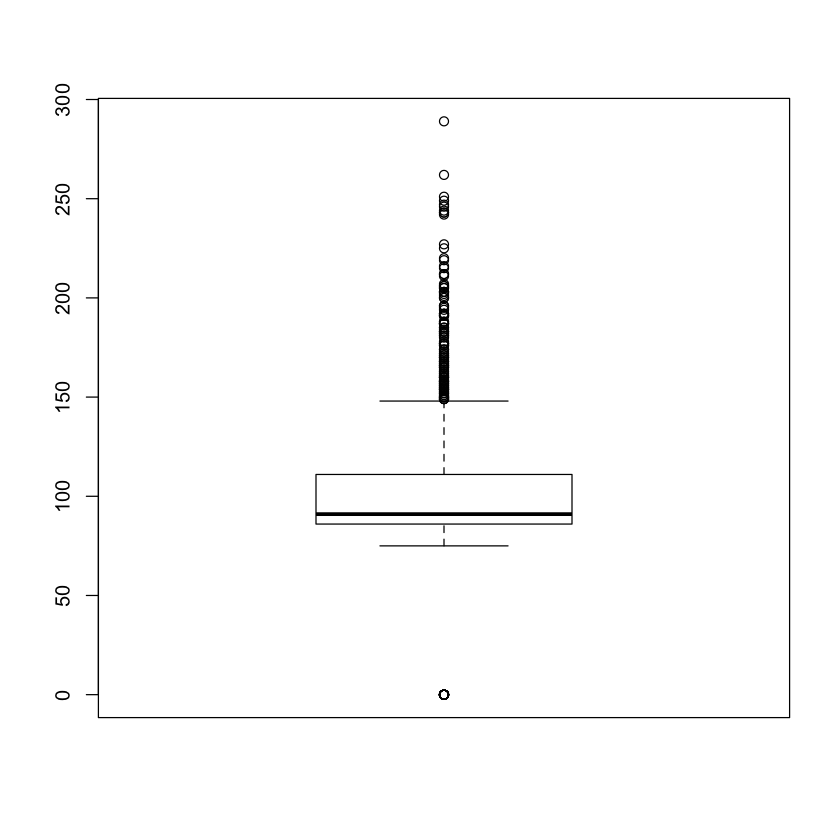

In [28]:
boxplot(seoDae$소요시간)

일차 소요시간 
1 0     98.14583
2 1    128.96875
3 2    101.22917
4 3     84.61458
5 4    104.80208

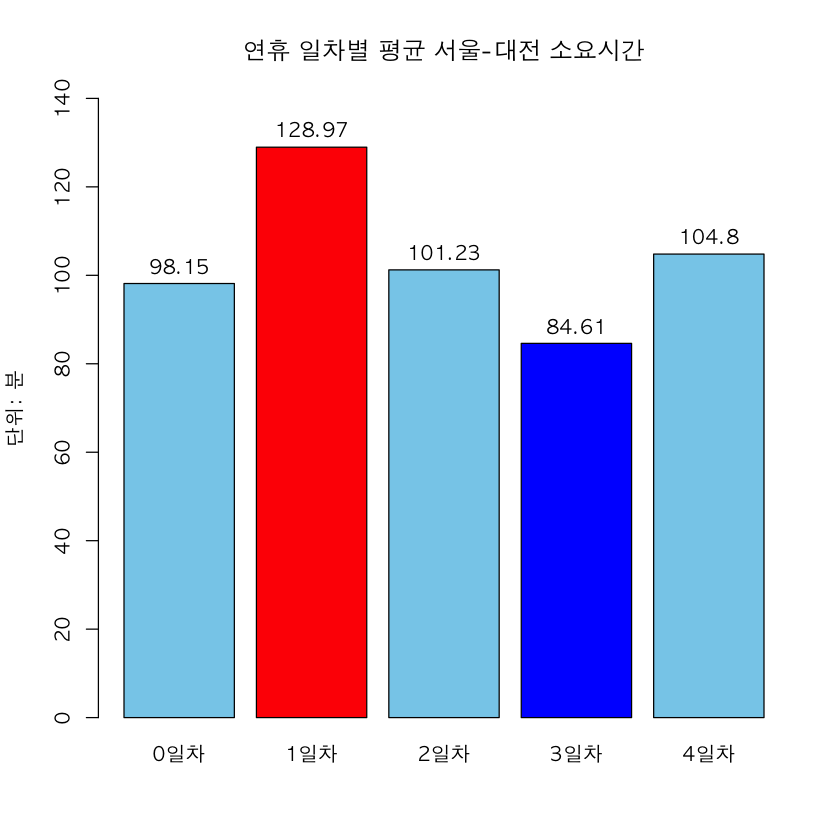

In [29]:
# aggregate(그룹화할 데이터컬럼 ~ 그룹화기준, 데이터셋, 연산)
# 연휴 일차별 평균 서울대전 소요시간
options(warn = -1)
par(family = "AppleGothic")
일차 <- aggregate(소요시간 ~ 일차, seoDae, mean)
일차
barplot(
    aggregate(소요시간 ~ 일차, seoDae, mean)[,2],
    ylim = c(0, 140),
    ylab = c('단위: 분'),
    main = '연휴 일차별 평균 서울-대전 소요시간',
    col = c('skyblue','red','skyblue','blue','skyblue'),
    names = c('0일차','1일차','2일차','3일차','4일차'),
    
    
)

# 글자 쓰기 text(x축, y축, 내용, str = 기울기)

for(i in 1:nrow(일차)){
    text(
        0.7+1.2*(i-1),
        일차[i,2]+4,
        round(일차[i,2],2),
        )
}






출발시간 소요시간
1   0        94.575 
2   1        94.225 
3   2        94.750 
4   3        96.250 
5   4        94.900 
6   5        94.325 
7   6        95.425 
8   7        98.975 
9   8        98.675 
10  9       100.775 
11 10       103.925 
12 11       106.650 
13 12       112.575 
14 13       116.825 
15 14       110.500 
16 15       109.600 
17 16       109.675 
18 17       112.300 
19 18       113.000 
20 19       111.900 
21 20       109.150 
22 21       106.200 
23 22       102.700 
24 23        97.375

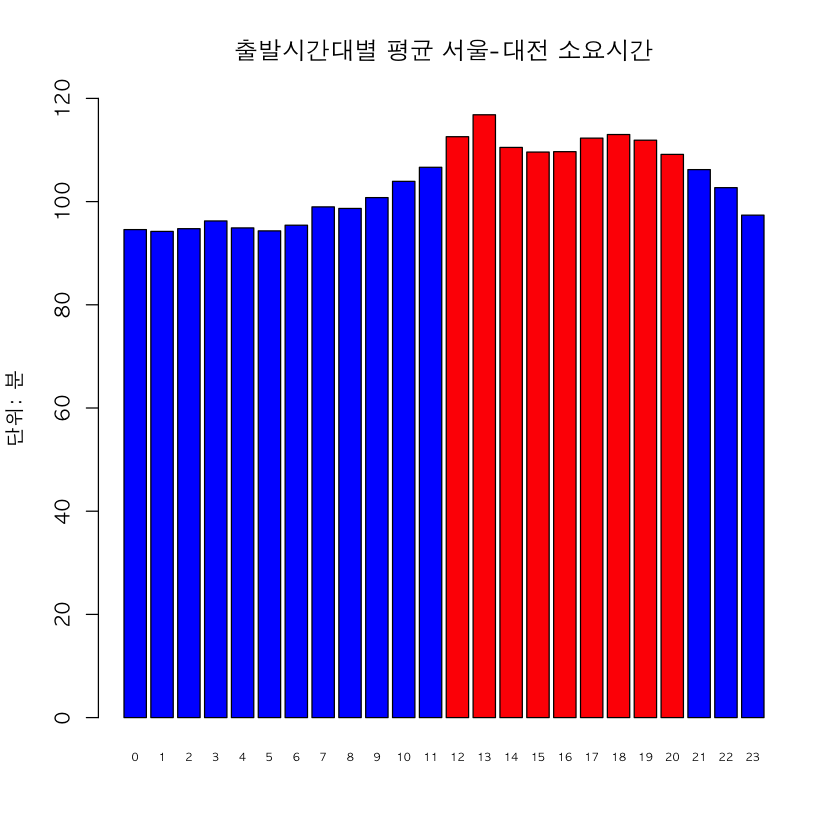

In [30]:
# 출발시간대별 평균 서울-대전 소요시간
# 일차별 - 출발시간대별 평균 서울-대전 소요시간 (0~4일차)
aggregate(소요시간 ~ 출발시간, seoDae, mean)
par(family = 'AppleGothic')
barplot(
    aggregate(소요시간 ~ 출발시간, seoDae, mean)[,2],
    main = '출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 120),
    ylab = '단위: 분',
    names = aggregate(소요시간 ~ 출발시간, seoDae, mean)[,1],
    cex.names = 0.55,
    col = ifelse(aggregate(소요시간 ~ 출발시간, seoDae, mean)[,2] >= 109, 'red', 'blue')
)

In [31]:
library(dplyr)

head(arrange(seoDae, desc(소요시간)))

head(arrange(seoDae[seoDae$소요시간 != 0,],소요시간))


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



년도 일차 출발시간 소요시간
1 2019 4    14       289     
2 2019 4    15       262     
3 2015 1    13       251     
4 2015 0    22       249     
5 2019 4    16       247     
6 2015 0    23       246

년도 일차 출발시간 소요시간
1 2018 4    2        75      
2 2019 0    2        75      
3 2018 2    0        76      
4 2018 4    0        76      
5 2016 0    6        77      
6 2017 2    2        77

In [32]:
seoDae2 <- subset(seoDae, 소요시간 != 0)
nrow(seoDae2)
table(seoDae2$소요시간)
table(seoDae2$일차)

[1] 928


 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94 
  2   2   3   5  18  22  21  30  25  38  34  38  54  46  55  40  40  30  35  22 
 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 
 18  11  14   6  12   5   5  12   5   9   3   7   5   5   3   2   7   7   5   1 
115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 
  2   1   2   6   4   2   5   2   3   2   4   2   3   3   2   1   3   3   6   2 
135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 
  2   1   2   1   5   1   1   1   4   5   4   4   4   3   4   4   2   3   2   4 
155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 
  3   3   3   4   1   4   2   2   2   1   3   3   2   3   1   3   2   2   1   2 
176 177 178 180 181 182 183 184 185 187 188 191 192 194 195 196 200 201 202 203 
  2   3   1   1   2   2   3   1   2   4   2   3   3   1   1   2   2   1   1   3 
205 206 207 211 212 215 216


  0   1   2   3   4 
182 192 192 172 190 

In [33]:
# 년도, 일차, 출발시간
# 일차
seoDae0 <- subset(seoDae, 일차 == 0)
head(seoDae0)
seoDae1 <- subset(seoDae, 일차 == 1)
head(seoDae1)
seoDae2 <- subset(seoDae, 일차 == 2)
head(seoDae2)
seoDae3 <- subset(seoDae, 일차 == 3)
head(seoDae3)
seoDae4 <- subset(seoDae, 일차 == 4)
head(seoDae4)

년도 일차 출발시간 소요시간
1  2013 0    0        91      
6  2013 0    1        88      
11 2013 0    2        88      
16 2013 0    3        87      
21 2013 0    4        91      
26 2013 0    5        97

년도 일차 출발시간 소요시간
2  2013 1    0        132     
7  2013 1    1        129     
12 2013 1    2        121     
17 2013 1    3        124     
22 2013 1    4        119     
27 2013 1    5        118

년도 일차 출발시간 소요시간
3  2013 2    0         83     
8  2013 2    1         82     
13 2013 2    2        102     
18 2013 2    3        100     
23 2013 2    4         93     
28 2013 2    5        106

년도 일차 출발시간 소요시간
4  2013 3    0        87      
9  2013 3    1        85      
14 2013 3    2        89      
19 2013 3    3        84      
24 2013 3    4        85      
29 2013 3    5        81

년도 일차 출발시간 소요시간
5  2013 4    0        84      
10 2013 4    1        82      
15 2013 4    2        78      
20 2013 4    3        79      
25 2013 4    4        84      
30 2013 4    5        79

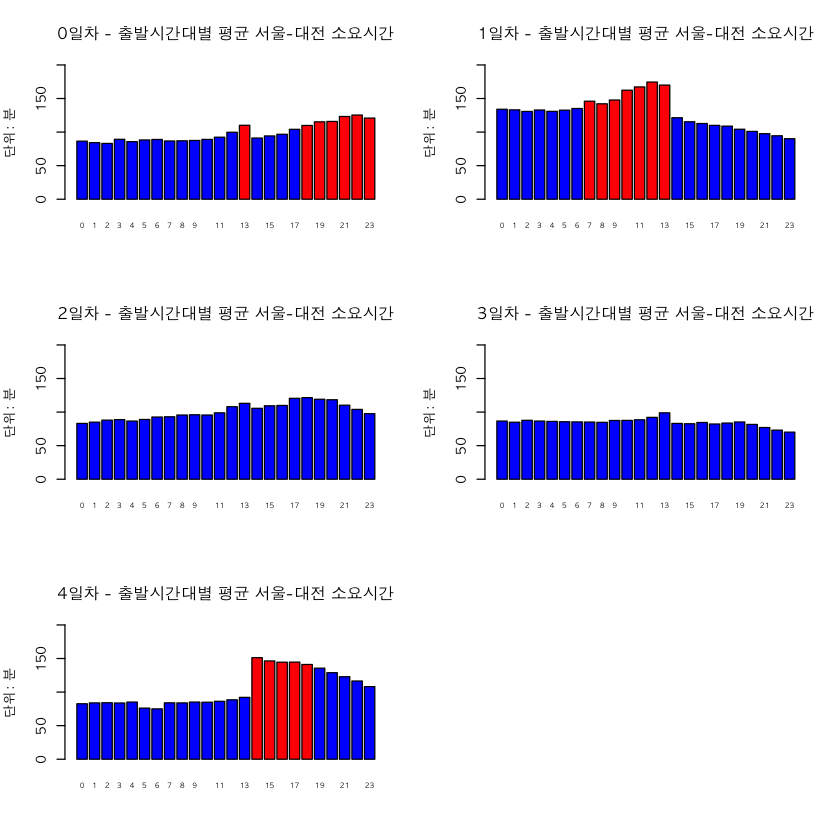

In [34]:
# 일차별 - 출발시간대별 소요시간
par(mfrow = c(3,2))
#0일차
aggSeoDae0 <- aggregate(소요시간 ~ 출발시간, seoDae0, mean)
# aggSeoDae0
par(family = 'AppleGothic')
barplot(
    aggSeoDae0[,2],
    main = '0일차 - 출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 200),
    ylab = '단위: 분',
    names = aggSeoDae0[,1],
    cex.names = 0.55,
    col = ifelse(aggSeoDae0[,2] >= 109, 'red', 'blue')
)
# 1일차
aggSeoDae1 <- aggregate(소요시간 ~ 출발시간, seoDae1, mean)
# aggSeoDae1
par(family = 'AppleGothic')
barplot(
    aggSeoDae1[,2],
    main = '1일차 - 출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 200),
    ylab = '단위: 분',
    names = aggSeoDae1[,1],
    cex.names = 0.55,
    col = ifelse(aggSeoDae1[,2] >= 140, 'red', 'blue')
)
# 2일차
aggSeoDae2 <- aggregate(소요시간 ~ 출발시간, seoDae2, mean)
# aggSeoDae2
par(family = 'AppleGothic')
barplot(
    aggSeoDae2[,2],
    main = '2일차 - 출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 200),
    ylab = '단위: 분',
    names = aggSeoDae2[,1],
    cex.names = 0.55,
    col = ifelse(aggSeoDae2[,2] >= 140, 'red', 'blue')
)
# 3일차
aggSeoDae3 <- aggregate(소요시간 ~ 출발시간, seoDae3, mean)
# aggSeoDae3
par(family = 'AppleGothic')
barplot(
    aggSeoDae3[,2],
    main = '3일차 - 출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 200),
    ylab = '단위: 분',
    names = aggSeoDae3[,1],
    cex.names = 0.55,
    col = ifelse(aggSeoDae3[,2] >= 140, 'red', 'blue')
)
# 4일차
aggSeoDae4 <- aggregate(소요시간 ~ 출발시간, seoDae4, mean)
# aggSeoDae4
par(family = 'AppleGothic')
barplot(
    aggSeoDae4[,2],
    main = '4일차 - 출발시간대별 평균 서울-대전 소요시간',
    ylim = c(0, 200),
    ylab = '단위: 분',
    names = aggSeoDae4[,1],
    cex.names = 0.55,
    col = ifelse(aggSeoDae4[,2] >= 140, 'red', 'blue')
)

In [35]:
max(seoDae0$소요시간)
max(seoDae1$소요시간)
max(seoDae2$소요시간)
max(seoDae3$소요시간)
max(seoDae4$소요시간)

[1] 249

[1] 251

[1] 206

[1] 168

[1] 289

In [36]:
library(caret)
# 인공신경망, 다항 로지스틱 회귀분석
library(nnet)
# 의사결정나무
library(party)
# 랜덤포레스트
library(randomForest)
# SVM
library(e1071)



samp <- createDataPartition(seoDae$소요시간, p=0.7, list=F)

data.tr <- seoDae[samp, ]
data.test <- seoDae[-samp,]

x <- subset(data.test, select = -소요시간)

y <- data.test$소요시간



In [37]:


samp <- createDataPartition(seoDae$소요시간, p=0.7, list=F)

data.tr <- seoDae[samp, ]
data.test <- seoDae[-samp,]

x <- subset(data.test, select = -소요시간)

y <- data.test$소요시간



In [38]:
    model.nnet <- nnet(소요시간 ~ ., data=data.tr, size=3) 

    pred <- predict(model.nnet, x, type = "class")

    mean(pred == y)

# weights:  16
initial  value 8244379.554562 
final  value 8175977.000000 
converged


ERROR: Error in predict.nnet(model.nnet, x, type = "class"): inappropriate fit for class


In [39]:
library(readxl)

In [40]:
seoulPop <- read_excel("../Data_Project/서울인구(2013-2020).xls")

New names:
* 인구 -> 인구...4
* 인구 -> 인구...5
* 인구 -> 인구...6
* 인구 -> 인구...7
* 인구 -> 인구...8
* … and 6 more problems


In [41]:
seoulPop <- seoulPop[-c(1:2),c(1,4)]

In [42]:
colnames(seoulPop) <- c('년도', '서울인구수')

In [43]:
seoulPop

년도 서울인구수
1 2013 10388055  
2 2014 10369593  
3 2015 10297138  
4 2016 10204057  
5 2017 10124579  
6 2018 10049607  
7 2019 10010983  
8 2020 9911088

In [44]:
seoulCar <- read.csv("../Data_Project/서울자동차등록현황 - Sheet1 (2).csv")

In [45]:
seoulCar
seoulCar2 <- seoulCar[c(1,6,11,16,21,26,31,37),-2]



기간 규모별       계        승용차    승합차  화물차  특수차
1  2013 계           2,973,877 2,462,515 156,871 349,285 5,206 
2    NA 경형         198,073   164,336   9,579   24,134  24    
3    NA 소형         378,998   140,741   8,440   227,979 1,838 
4    NA 중형         1,619,841 1,414,740 125,424 77,980  1,697 
5    NA 대형         776,965   742,698   13,428  19,192  1,647 
6  2014 계           3,013,541 2,510,742 149,991 346,980 5,828 
7    NA 경형         205,558   173,533   8,886   23,113  26    
8    NA 소형         361,193   120,721   7,761   230,397 2,314 
9    NA 중형         1,645,713 1,450,303 119,725 73,898  1,787 
10   NA 대형         801,077   766,185   13,619  19,572  1,701 
11 2015 계           3,056,588 2,560,154 141,927 347,765 6,742 
12   NA 경형         212,296   180,802   8,404   23,064  26    
13   NA 소형         348,149   102,388   7,052   235,712 2,997 
14   NA 중형         1,666,881 1,483,388 112,653 68,900  1,940 
15   NA 대형         829,262   793,576   13,818  20,089  1,779 
16 2016 계           3,083,007 2,598,344 134,309 343,173 7,181 
17   NA 경형         215,912   185,699   7,891   22,301  21    
18   NA 소형         334,013   87,757    6,482   236,421 3,353 
19   NA 중형         1,679,391 1,507,644 106,138 63,618  1,991 
20   NA 대형         853,691   817,244   13,798  20,833  1,816 
21 2017 계           3,116,256 2,641,190 127,564 339,921 7,581 
22   NA 경형         220,851   191,736   7,818   21,278  19    
23   NA 소형         323,859   75,636    5,986   238,603 3,634 
24   NA 중형         1,689,724 1,528,821 100,000 58,830  2,073 
25   NA 대형         881,822   844,997   13,760  21,210  1,855 
26 2018 계           3,124,651 2,658,637 120,780 337,241 7,993 
27   NA 경형         223,120   195,676   7,249   20,182  13    
28   NA 소형         317,539   65,944    5,614   241,970 4,011 
29   NA 중형         1,685,049 1,534,990 94,270  53,700  2,089 
30   NA 대형         898,943   862,027   13,647  21,389  1,880 
31 2019 합계         3,124,157 2,670,803 114,310 330,840 8,204 
32   NA 경형(일반)   225,337   198,951   7,086   19,286  14    
33   NA 경형(초소형) 431       190       -       241     -     
34   NA 소형         309,377   57,992    5,324   241,745 4,316 
35   NA 중형         1,681,338 1,542,604 88,262  48,439  2,033 
36   NA 대형         907,674   871,066   13,638  21,129  1,841 
37 2020 합계         3,157,361 2,711,984 106,504 329,943 8,930 
38   NA 경형(일반)   230,285   203,738   7,054   19,451  42    
39   NA 경형(초소형) 976       377       -       599     -     
40   NA 소형         305,282   51,449    5,094   243,721 5,018 
41   NA 중형         1,683,288 1,554,896 81,263  45,122  2,007 
42   NA 대형         937,530   901,524   13,093  21,050  1,863

In [46]:
library(stringr)

seoulCar2 <- seoulCar2[,2:4]


Attaching package: ‘stringr’

The following object is masked from ‘package:strucchange’:

    boundary



In [47]:
head(seoulCar2)

계        승용차    승합차 
1  2,973,877 2,462,515 156,871
6  3,013,541 2,510,742 149,991
11 3,056,588 2,560,154 141,927
16 3,083,007 2,598,344 134,309
21 3,116,256 2,641,190 127,564
26 3,124,651 2,658,637 120,780

In [48]:
for(i in 1:ncol(seoulCar2)){
    seoulCar2[,i] <- str_remove_all(seoulCar2[,i], ",")
}
head(seoulCar2)

계      승용차  승합차
1  2973877 2462515 156871
6  3013541 2510742 149991
11 3056588 2560154 141927
16 3083007 2598344 134309
21 3116256 2641190 127564
26 3124651 2658637 120780

In [49]:
for(i in 1:ncol(seoulCar2)){
    seoulCar2[,i] <- as.numeric(seoulCar2[,i])
}
str(seoulCar2)
seoulCar2 <- seoulCar2[,-1]

'data.frame':	8 obs. of  3 variables:
 $ 계    : num  2973877 3013541 3056588 3083007 3116256 ...
 $ 승용차: num  2462515 2510742 2560154 2598344 2641190 ...
 $ 승합차: num  156871 149991 141927 134309 127564 ...


In [50]:
popCar <- cbind(seoulPop, seoulCar2)

popCar$차합계 <- popCar$승용차 + popCar$승합차

head(popCar)

write.csv(popCar, "../Data_Project/인구수자동차수.csv")

년도 서울인구수 승용차  승합차 차합계 
1  2013 10388055   2462515 156871 2619386
6  2014 10369593   2510742 149991 2660733
11 2015 10297138   2560154 141927 2702081
16 2016 10204057   2598344 134309 2732653
21 2017 10124579   2641190 127564 2768754
26 2018 10049607   2658637 120780 2779417

In [51]:
sd22 <- read.csv("../Data_Project/서울대전5일(연휴앞뒤2일).csv")
sd05 <- read.csv("../Data_Project/서울대전5일(연휴시작기준).csv")

In [52]:
head(sd22)
head(sd05)

년도 일차 출발시간 소요시간
1 2013 0    0         91     
2 2013 1    0        132     
3 2013 2    0         83     
4 2013 3    0         87     
5 2013 4    0         84     
6 2013 0    1         88

년도 일차 출발시간 소요시간
1 2013 0    0         91     
2 2013 1    0        132     
3 2013 2    0         83     
4 2013 3    0         87     
5 2013 4    0         84     
6 2013 0    1         88

In [53]:
tail(sd22)
tail(sd05)

년도 일차 출발시간 소요시간
955 2020 4    22        97     
956 2020 0    23       179     
957 2020 1    23        90     
958 2020 2    23       102     
959 2020 3    23        89     
960 2020 4    23        94

년도 일차 출발시간 소요시간
955 2020 4    22        97     
956 2020 0    23       179     
957 2020 1    23        90     
958 2020 2    23       102     
959 2020 3    23        89     
960 2020 4    23        94

In [54]:
carRoute <- read.csv("../Data_Project/노선별_이용차량__통행료수입_현황_20220609153835 - 노선별_이용차량__통행료수입_현황_20220609153835.csv")

In [55]:
carRoute

시점       경부선       경부선.1     서해안선     서해안선.1   당진영덕선  
1  시점       1종대수 (대) 2종대수 (대) 1종대수 (대) 2종대수 (대) 1종대수 (대)
2  2013.02.08 968888       39241        323522       11858        164925      
3  2013.02.09 959047       9423         327597       2445         197280      
4  2013.02.10 1216472      2467         395280       749          245735      
5  2013.02.11 1028356      6569         345321       1910         219738      
6  2013.02.12 898678       27918        284932       8559         148931      
7  2014.01.29 1042639      37747        325381       10310        174523      
8  2014.01.30 1036833      10262        332032       2518         217426      
9  2014.01.31 1319671      2678         427603       822          271966      
10 2014.02.01 1045518      5325         350197       1475         231746      
11 2014.02.02 897242       8326         283116       2133         183519      
12 2015.02.17 1076035      40069        340906       11046        182094      
13 2015.02.18 1105471      10268        365319       2616         244601      
14 2015.02.19 1358747      2627         451095       748          292235      
15 2015.02.20 1146936      6197         400115       1896         260413      
16 2015.02.21 970281       13779        327233       3587         213008      
17 2015.02.22 874178       9689         268227       2751         164511      
18 2016.02.05 1068138      44377        369693       15061        170651      
19 2016.02.06 991231       20560        380154       5715         205761      
20 2016.02.07 983209       5881         371354       1849         199382      
21 2016.02.08 1356474      2643         534206       852          310468      
22 2016.02.09 1156292      6203         466247       1909         272765      
23 2016.02.10 974491       14847        376537       4459         198814      
24 2017.01.26 1146246      35540        398032       10294        240032      
25 2017.01.27 1079232      10115        405479       2583         294813      
26 2017.01.28 1373433      2538         516010       833          360658      
27 2017.01.29 1072362      4179         417428       1244         294386      
28 2017.01.30 962032       13550        348268       3300         238618      
29 2018.02.14 1149437      36244        397953       10612        233056      
30 2018.02.15 67337        508          2553         53           -           
31 2018.02.16 93822        110          6092         32           -           
32 2018.02.17 69466        248          2819         34           -           
33 2018.02.18 1024300      7928         378853       2309         252856      
34 2019.02.01 1105467      41508        334773       11332        191144      
35 2019.02.02 1035289      21436        337363       4846         234642      
36 2019.02.03 893411       8168         316414       1870         236510      
37 2019.02.04 1043372      8347         360794       1972         275013      
38 2019.02.05 1397192      2599         474182       770          379628      
39 2019.02.06 1172106      7919         416250       1972         327644      
40 2019.02.07 1015093      32568        309358       9420         174784      
41 2020.01.23 1231203      34516        439835       9995         272175      
42 2020.01.24 79897        377          13974        11           3023        
43 2020.01.25 114389       113          27212        14           5972        
44 2020.01.26 1322546      4511         518355       1292         359390      
45 2020.01.27 988096       13785        381504       3273         264816      
   당진영덕선.1 중부선.통영대전선. 중부선.통영대전선..1 중부내륙선  
1  2종대수 (대) 1종대수 (대)       2종대수 (대)         1종대수 (대)
2  4081         322012             14345                232075      
3  906          335202             3352                 281441      
4  410          429051             979                  335816      
5  731          350099             2544                 289811      
6  3135         288425             11513

In [56]:
# 1종 차량 합계
aa<-carRoute[-1,c(2,4,6,8,10,12,14)]

head(aa)
for(i in 1:ncol(aa)){
    aa[,i] <- str_replace_all(aa[,i], '-', '0')
}

for(i in 1:ncol(aa)){
    aa[,i] <- as.numeric(aa[,i])
}
head(aa)

경부선  서해안선 당진영덕선 중부선.통영대전선. 중부내륙선 영동선
2 968888  323522   164925     322012             232075     440800
3 959047  327597   197280     335202             281441     442369
4 1216472 395280   245735     429051             335816     521705
5 1028356 345321   219738     350099             289811     464728
6 898678  284932   148931     288425             204269     419569
7 1042639 325381   174523     366897             255951     478480
  중앙선.대구부산선.
2 365384            
3 418590            
4 539992            
5 450783            
6 317699            
7 379872

경부선  서해안선 당진영덕선 중부선.통영대전선. 중부내륙선 영동선
2  968888 323522   164925     322012             232075     440800
3  959047 327597   197280     335202             281441     442369
4 1216472 395280   245735     429051             335816     521705
5 1028356 345321   219738     350099             289811     464728
6  898678 284932   148931     288425             204269     419569
7 1042639 325381   174523     366897             255951     478480
  중앙선.대구부산선.
2 365384            
3 418590            
4 539992            
5 450783            
6 317699            
7 379872

In [57]:
aa$합계1종 <- aa$경부선+aa$서해안선+aa$당진영덕선+aa$중부선.통영대전선.+aa$중부내륙선+aa$영동선+aa$중앙선.대구부산선.
head(aa)

경부선  서해안선 당진영덕선 중부선.통영대전선. 중부내륙선 영동선
2  968888 323522   164925     322012             232075     440800
3  959047 327597   197280     335202             281441     442369
4 1216472 395280   245735     429051             335816     521705
5 1028356 345321   219738     350099             289811     464728
6  898678 284932   148931     288425             204269     419569
7 1042639 325381   174523     366897             255951     478480
  중앙선.대구부산선. 합계1종
2 365384             2817606
3 418590             2961526
4 539992             3684051
5 450783             3148836
6 317699             2562503
7 379872             3023743

In [58]:
# 2종 차량 합계
bb<-carRoute[-1,c(3,5,7,9,11,13,15)]

head(bb)
for(i in 1:ncol(bb)){
    bb[,i] <- str_replace_all(bb[,i], '-', '0')
}

for(i in 1:ncol(bb)){
    bb[,i] <- as.numeric(bb[,i])
}
head(bb)


경부선.1 서해안선.1 당진영덕선.1 중부선.통영대전선..1 중부내륙선.1 영동선.1
2 39241    11858      4081         14345                10084        21115   
3 9423     2445       906          3352                 1595         5296    
4 2467     749        410          979                  513          1501    
5 6569     1910       731          2544                 1235         4009    
6 27918    8559       3135         11513                5892         16220   
7 37747    10310      3611         14345                9202         19870   
  중앙선.대구부산선..1
2 15354               
3 3313                
4 761                 
5 2139                
6 9401                
7 14118

경부선.1 서해안선.1 당진영덕선.1 중부선.통영대전선..1 중부내륙선.1 영동선.1
2 39241    11858      4081         14345                10084        21115   
3  9423     2445       906          3352                 1595         5296   
4  2467      749       410           979                  513         1501   
5  6569     1910       731          2544                 1235         4009   
6 27918     8559      3135         11513                 5892        16220   
7 37747    10310      3611         14345                 9202        19870   
  중앙선.대구부산선..1
2 15354               
3  3313               
4   761               
5  2139               
6  9401               
7 14118

In [59]:
bb$합계2종 <- bb$경부선+bb$서해안선+bb$당진영덕선+bb$중부선.통영대전선.+bb$중부내륙선+bb$영동선+bb$중앙선.대구부산선.
bb

경부선.1 서해안선.1 당진영덕선.1 중부선.통영대전선..1 중부내륙선.1 영동선.1
2  39241    11858      4081         14345                10084        21115   
3   9423     2445       906          3352                 1595         5296   
4   2467      749       410           979                  513         1501   
5   6569     1910       731          2544                 1235         4009   
6  27918     8559      3135         11513                 5892        16220   
7  37747    10310      3611         14345                 9202        19870   
8  10262     2518       958          3647                 1865         5362   
9   2678      822       371          1072                  594         1714   
10  5325     1475       632          1958                 1060         3207   
11  8326     2133       884          3708                 1895         4948   
12 40069    11046      4135         15432                10281        20897   
13 10268     2616       991          3958                 1918         5745   
14  2627      748       362          1052                  620         1551   
15  6197     1896       689          2518                 1279         4154   
16 13779     3587      1416          5194                 2648         7384   
17  9689     2751      1232          4030                 2655         5585   
18 44377    15061      4986         16778                11489        22922   
19 20560     5715      1761          7217                 4414        10738   
20  5881     1849       587          2230                 1116         3338   
21  2643      852       338           965                  505         1610   
22  6203     1909       651          2347                 1137         3803   
23 14847     4459      1357          5602                 3054         8503   
24 35540    10294      4277         12439                 8967        17549   
25 10115     2583      1060          3136                 1789         5243   
26  2538      833       421           890                  527         1463   
27  4179     1244       517          1515                  908         2531   
28 13550     3300      1393          5081                 2487         7091   
29 36244    10612      4383         13800                 6323        18597   
30   508       53         0           236                    0            0   
31   110       32         0            46                    0            0   
32   248       34         0            83                    0            0   
33  7928     2309      1071          3571                 1290         5006   
34 41508    11332      4953         16138                 6933        19482   
35 21436     4846      2279          7665                 2817         9399   
36  8168     1870       862          3432                 1066         4432   
37  8347     1972       868          3104                  909         4418   
38  2599      770       432          1129                  407         1552   
39  7919     1972       880          3193                 1017         4432   
40 32568     9420      3857         13052                 5035        16455   
41 34516     9995      4552         13518                 5770        16844   
42   377       11         1           175                    2            5   
43   113       14         0            39                    2            6   
44  4511     1292       663          1775                  681         2830   
45 13785     3273      1692          5390                 1784         7055   
   중앙선.대구부산선..1 합계2종
2  15354                116078 
3   3313                 26330 
4    761                  7380 
5   2139                 19137 
6   9401                 82638 
7  14118                109203 
8   3780                 28392 
9    793                  8044 
10  1794                 15451 
11  2799                 24693 
12 12962                114822 
13  3265                 28761 
14   875                  7835 
15  1839                 18572 
16  419

In [60]:
carRoute2 <- data.frame(aa$합계1종, bb$합계2종)

In [61]:
colnames(carRoute2) <- c('1종차량수', '2종차량수')

In [62]:
carRoute3 <- cbind(carRoute$시점[-1],carRoute2)

In [63]:
colnames(carRoute3) <- c('년도월일','1종차량수','2종차량수')

In [64]:
carRoute3

년도월일   1종차량수 2종차량수
1  2013.02.08 2817606   116078   
2  2013.02.09 2961526    26330   
3  2013.02.10 3684051     7380   
4  2013.02.11 3148836    19137   
5  2013.02.12 2562503    82638   
6  2014.01.29 3023743   109203   
7  2014.01.30 3195831    28392   
8  2014.01.31 4052050     8044   
9  2014.02.01 3221213    15451   
10 2014.02.02 2662401    24693   
11 2015.02.17 3100001   114822   
12 2015.02.18 3444983    28761   
13 2015.02.19 4182694     7835   
14 2015.02.20 3601881    18572   
15 2015.02.21 2965021    38205   
16 2015.02.22 2558728    28853   
17 2016.02.05 2994281   130221   
18 2016.02.06 3045537    57564   
19 2016.02.07 3050143    16818   
20 2016.02.08 4291069     7677   
21 2016.02.09 3707196    17953   
22 2016.02.10 3053119    42498   
23 2017.01.26 3415825   101352   
24 2017.01.27 3470148    27152   
25 2017.01.28 4418645     7425   
26 2017.01.29 3508551    12234   
27 2017.01.30 3007858    37132   
28 2018.02.14 3278319   102719   
29 2018.02.15   95684      818   
30 2018.02.16  129543      193   
31 2018.02.17  100577      370   
32 2018.02.18 3094059    23855   
33 2019.02.01 2953288   114649   
34 2019.02.02 2943137    56160   
35 2019.02.03 2646942    22738   
36 2019.02.04 3118100    22513   
37 2019.02.05 4251956     7857   
38 2019.02.06 3527918    22222   
39 2019.02.07 2724194    91210   
40 2020.01.23 3559161    96764   
41 2020.01.24  158163      590   
42 2020.01.25  238876      185   
43 2020.01.26 4121907    13136   
44 2020.01.27 3020995    37358

In [65]:
write.csv(carRoute3, "../Data_Project/노선별일별차량운영대수(서울-대전,2013-2020,1종2종).csv")

In [66]:
seoulWeather <- read.csv("../Data_Project/sdw-tf - sdw-tf.csv")

In [67]:
seoulWeather <- seoulWeather[,-(1:3)]

In [68]:
write.csv(seoulWeather, "../Data_Project/서울날씨(2013-2020,날짜별).csv")

In [69]:
head(seoulWeather)

일시            기온  강수량mm 적설량cm 비또는눈
1 2013-02-08 0:00 -13.6 0        12.7     TRUE    
2 2013-02-08 1:00 -13.8 0        12.7     TRUE    
3 2013-02-08 2:00 -14.1 0        12.7     TRUE    
4 2013-02-08 3:00 -14.5 0        12.7     TRUE    
5 2013-02-08 4:00 -14.8 0        12.7     TRUE    
6 2013-02-08 5:00 -15.0 0        12.7     TRUE

In [70]:
traffic <- read.csv("../Data_Project/시간대별 교통량(평균,폐쇠식-개방식) - 시간대별 교통량(평균,폐쇠식-개방식).csv")

In [71]:
head(traffic)
ncol(traffic)

년도 시간.1. X1종입구교통량.폐쇠식. X2종입구교통량.폐쇠식.
1 2013 00 ~ 01 3793419                229419                
2 2013 01 ~ 02 2514790                203047                
3 2013 02 ~ 03 1846564                235137                
4 2013 03 ~ 04 1632415                305994                
5 2013 04 ~ 05 2247045                444384                
6 2013 05 ~ 06 5186824                774325                
  X1종출구교통량.폐쇠식. X2종출구교통량.폐쇠식. X1종입구교통량.개방식.
1 5137855                237975                 1078045               
2 3351767                212178                  731582               
3 2258842                203682                  512487               
4 1717092                247216                  412849               
5 1764954                326806                  514590               
6 3410239                531075                 1215648               
  X2종입구교통량.개방식. X1종출구교통량.개방식. X2종출구교통량.개방식.
1  27901                 1360444                27906                 
2  26703                  920823                28072                 
3  29686                  632342                27573                 
4  40368                  468618                31105                 
5  59964                  449215                43594                 
6 116061                  854884                77115

[1] 10

In [72]:
#1종출구교통량
traffic_1 <- traffic[,c(3,5,7,9)]
head(traffic_1)

X1종입구교통량.폐쇠식. X1종출구교통량.폐쇠식. X1종입구교통량.개방식.
1 3793419                5137855                1078045               
2 2514790                3351767                 731582               
3 1846564                2258842                 512487               
4 1632415                1717092                 412849               
5 2247045                1764954                 514590               
6 5186824                3410239                1215648               
  X1종출구교통량.개방식.
1 1360444               
2  920823               
3  632342               
4  468618               
5  449215               
6  854884

In [73]:
#2종출구교통량

traffic_2 <- traffic[,c(4,6,8,10)]
head(traffic_2)

X2종입구교통량.폐쇠식. X2종출구교통량.폐쇠식. X2종입구교통량.개방식.
1 229419                 237975                  27901                
2 203047                 212178                  26703                
3 235137                 203682                  29686                
4 305994                 247216                  40368                
5 444384                 326806                  59964                
6 774325                 531075                 116061                
  X2종출구교통량.개방식.
1 27906                 
2 28072                 
3 27573                 
4 31105                 
5 43594                 
6 77115

In [74]:
#1종출구교통량 합계

traffic_1$"1종출구교통량(합계)" <- traffic_1$X1종입구교통량.폐쇠식.+ traffic_1$X1종출구교통량.폐쇠식. + traffic_1$X1종입구교통량.개방식. + traffic_1$X1종출구교통량.개방식. 
head(traffic_1)

X1종입구교통량.폐쇠식. X1종출구교통량.폐쇠식. X1종입구교통량.개방식.
1 3793419                5137855                1078045               
2 2514790                3351767                 731582               
3 1846564                2258842                 512487               
4 1632415                1717092                 412849               
5 2247045                1764954                 514590               
6 5186824                3410239                1215648               
  X1종출구교통량.개방식. 1종출구교통량(합계)
1 1360444                11369763           
2  920823                 7518962           
3  632342                 5250235           
4  468618                 4230974           
5  449215                 4975804           
6  854884                10667595

In [75]:
#2종출구교통량 합계

traffic_2$"2종출구교통량(합계)" <- traffic_2$X2종입구교통량.폐쇠식. + traffic_2$X2종출구교통량.폐쇠식. + traffic_2$X2종입구교통량.개방식. + traffic_2$X2종출구교통량.개방식.
head(traffic_2)

X2종입구교통량.폐쇠식. X2종출구교통량.폐쇠식. X2종입구교통량.개방식.
1 229419                 237975                  27901                
2 203047                 212178                  26703                
3 235137                 203682                  29686                
4 305994                 247216                  40368                
5 444384                 326806                  59964                
6 774325                 531075                 116061                
  X2종출구교통량.개방식. 2종출구교통량(합계)
1 27906                   523201            
2 28072                   470000            
3 27573                   496078            
4 31105                   624683            
5 43594                   874748            
6 77115                  1498576

In [76]:
traffic33 <- data.frame(traffic[,1], traffic[,2], traffic_1[,ncol(traffic_1)], traffic_2[,ncol(traffic_2)])
head(traffic33)

traffic...1. traffic...2. traffic_1...ncol.traffic_1..
1 2013         00 ~ 01      11369763                    
2 2013         01 ~ 02       7518962                    
3 2013         02 ~ 03       5250235                    
4 2013         03 ~ 04       4230974                    
5 2013         04 ~ 05       4975804                    
6 2013         05 ~ 06      10667595                    
  traffic_2...ncol.traffic_2..
1  523201                     
2  470000                     
3  496078                     
4  624683                     
5  874748                     
6 1498576

In [77]:
colnames(traffic33) <- c('년도', '시간대', '1종출구교통량합계', '2종출구교통량합계')

In [78]:
traffic33[,2] <- substring(traffic33[,2], 1, 2)

head(traffic33, 24)
head(sd22)
nrow(traffic33)

년도 시간대 1종출구교통량합계 2종출구교통량합계
1  2013 00     11369763           523201          
2  2013 01      7518962           470000          
3  2013 02      5250235           496078          
4  2013 03      4230974           624683          
5  2013 04      4975804           874748          
6  2013 05     10667595          1498576          
7  2013 06     23601930          2654556          
8  2013 07     36380071          3255498          
9  2013 08     41280228          3575060          
10 2013 09     43804586          4235654          
11 2013 10     49511497          4352751          
12 2013 11     50752300          4102493          
13 2013 12     48271340          3725102          
14 2013 13     50593221          3709434          
15 2013 14     53189461          3867277          
16 2013 15     54787052          3692778          
17 2013 16     56287190          3363121          
18 2013 17     58878514          2924553          
19 2013 18     54782095          2222097          
20 2013 19     43816635          1647751          
21 2013 20     36060321          1229771          
22 2013 21     30450086           926420          
23 2013 22     23724302           711809          
24 2013 23     16703904           586946

년도 일차 출발시간 소요시간
1 2013 0    0         91     
2 2013 1    0        132     
3 2013 2    0         83     
4 2013 3    0         87     
5 2013 4    0         84     
6 2013 0    1         88

[1] 192

In [79]:
table(sd22$일차)

head(sd22,24)
tail(sd22)
nrow(sd22)


  0   1   2   3   4 
192 192 192 192 192 

년도 일차 출발시간 소요시간
1  2013 0    0         91     
2  2013 1    0        132     
3  2013 2    0         83     
4  2013 3    0         87     
5  2013 4    0         84     
6  2013 0    1         88     
7  2013 1    1        129     
8  2013 2    1         82     
9  2013 3    1         85     
10 2013 4    1         82     
11 2013 0    2         88     
12 2013 1    2        121     
13 2013 2    2        102     
14 2013 3    2         89     
15 2013 4    2         78     
16 2013 0    3         87     
17 2013 1    3        124     
18 2013 2    3        100     
19 2013 3    3         84     
20 2013 4    3         79     
21 2013 0    4         91     
22 2013 1    4        119     
23 2013 2    4         93     
24 2013 3    4         85

년도 일차 출발시간 소요시간
955 2020 4    22        97     
956 2020 0    23       179     
957 2020 1    23        90     
958 2020 2    23       102     
959 2020 3    23        89     
960 2020 4    23        94

[1] 960

In [80]:
cbind(sd22, "1종출구교통량합계"=rep(0,nrow(sd22)))

년도 일차 출발시간 소요시간 1종출구교통량합계
1   2013 0    0         91      0                
2   2013 1    0        132      0                
3   2013 2    0         83      0                
4   2013 3    0         87      0                
5   2013 4    0         84      0                
6   2013 0    1         88      0                
7   2013 1    1        129      0                
8   2013 2    1         82      0                
9   2013 3    1         85      0                
10  2013 4    1         82      0                
11  2013 0    2         88      0                
12  2013 1    2        121      0                
13  2013 2    2        102      0                
14  2013 3    2         89      0                
15  2013 4    2         78      0                
16  2013 0    3         87      0                
17  2013 1    3        124      0                
18  2013 2    3        100      0                
19  2013 3    3         84      0                
20  2013 4    3         79      0                
21  2013 0    4         91      0                
22  2013 1    4        119      0                
23  2013 2    4         93      0                
24  2013 3    4         85      0                
25  2013 4    4         84      0                
26  2013 0    5         97      0                
27  2013 1    5        118      0                
28  2013 2    5        106      0                
29  2013 3    5         81      0                
30  2013 4    5         79      0                
... ...  ...  ...      ...      ...              
931 2020 0    18       153      0                
932 2020 1    18       130      0                
933 2020 2    18       152      0                
934 2020 3    18        98      0                
935 2020 4    18        94      0                
936 2020 0    19       162      0                
937 2020 1    19       117      0                
938 2020 2    19       147      0                
939 2020 3    19        97      0                
940 2020 4    19        89      0                
941 2020 0    20       180      0                
942 2020 1    20       108      0                
943 2020 2    20       132      0                
944 2020 3    20        93      0                
945 2020 4    20        94      0                
946 2020 0    21       195      0                
947 2020 1    21       102      0                
948 2020 2    21       118      0                
949 2020 3    21        89      0                
950 2020 4    21        95      0                
951 2020 0    22       167      0                
952 2020 1    22        97      0                
953 2020 2    22       108      0                
954 2020 3    22        87      0                
955 2020 4    22        97      0                
956 2020 0    23       179      0                
957 2020 1    23        90      0                
958 2020 2    23       102      0                
959 2020 3    23        89      0                
960 2020 4    23        94      0

In [81]:
#1종출구교통량합계
for(i in 1:nrow(traffic33)) {
    for (j in 1:5) {
        sd22[5*(i-1)+j,5] = traffic33[i,3] 
    }
}

In [82]:
head(sd22, 35)

년도 일차 출발시간 소요시간 V5      
1  2013 0    0         91      11369763
2  2013 1    0        132      11369763
3  2013 2    0         83      11369763
4  2013 3    0         87      11369763
5  2013 4    0         84      11369763
6  2013 0    1         88       7518962
7  2013 1    1        129       7518962
8  2013 2    1         82       7518962
9  2013 3    1         85       7518962
10 2013 4    1         82       7518962
11 2013 0    2         88       5250235
12 2013 1    2        121       5250235
13 2013 2    2        102       5250235
14 2013 3    2         89       5250235
15 2013 4    2         78       5250235
16 2013 0    3         87       4230974
17 2013 1    3        124       4230974
18 2013 2    3        100       4230974
19 2013 3    3         84       4230974
20 2013 4    3         79       4230974
21 2013 0    4         91       4975804
22 2013 1    4        119       4975804
23 2013 2    4         93       4975804
24 2013 3    4         85       4975804
25 2013 4    4         84       4975804
26 2013 0    5         97      10667595
27 2013 1    5        118      10667595
28 2013 2    5        106      10667595
29 2013 3    5         81      10667595
30 2013 4    5         79      10667595
31 2013 0    6         96      23601930
32 2013 1    6        128      23601930
33 2013 2    6        100      23601930
34 2013 3    6         81      23601930
35 2013 4    6         80      23601930

In [83]:
cbind(sd22, "2종출구교통량합계"=rep(0,nrow(sd22)))

년도 일차 출발시간 소요시간 V5        2종출구교통량합계
1   2013 0    0         91      11369763  0                
2   2013 1    0        132      11369763  0                
3   2013 2    0         83      11369763  0                
4   2013 3    0         87      11369763  0                
5   2013 4    0         84      11369763  0                
6   2013 0    1         88       7518962  0                
7   2013 1    1        129       7518962  0                
8   2013 2    1         82       7518962  0                
9   2013 3    1         85       7518962  0                
10  2013 4    1         82       7518962  0                
11  2013 0    2         88       5250235  0                
12  2013 1    2        121       5250235  0                
13  2013 2    2        102       5250235  0                
14  2013 3    2         89       5250235  0                
15  2013 4    2         78       5250235  0                
16  2013 0    3         87       4230974  0                
17  2013 1    3        124       4230974  0                
18  2013 2    3        100       4230974  0                
19  2013 3    3         84       4230974  0                
20  2013 4    3         79       4230974  0                
21  2013 0    4         91       4975804  0                
22  2013 1    4        119       4975804  0                
23  2013 2    4         93       4975804  0                
24  2013 3    4         85       4975804  0                
25  2013 4    4         84       4975804  0                
26  2013 0    5         97      10667595  0                
27  2013 1    5        118      10667595  0                
28  2013 2    5        106      10667595  0                
29  2013 3    5         81      10667595  0                
30  2013 4    5         79      10667595  0                
... ...  ...  ...      ...      ...       ...              
931 2020 0    18       153      145540868 0                
932 2020 1    18       130      145540868 0                
933 2020 2    18       152      145540868 0                
934 2020 3    18        98      145540868 0                
935 2020 4    18        94      145540868 0                
936 2020 0    19       162      107548314 0                
937 2020 1    19       117      107548314 0                
938 2020 2    19       147      107548314 0                
939 2020 3    19        97      107548314 0                
940 2020 4    19        89      107548314 0                
941 2020 0    20       180       85398817 0                
942 2020 1    20       108       85398817 0                
943 2020 2    20       132       85398817 0                
944 2020 3    20        93       85398817 0                
945 2020 4    20        94       85398817 0                
946 2020 0    21       195       68703818 0                
947 2020 1    21       102       68703818 0                
948 2020 2    21       118       68703818 0                
949 2020 3    21        89       68703818 0                
950 2020 4    21        95       68703818 0                
951 2020 0    22       167       48472139 0                
952 2020 1    22        97       48472139 0                
953 2020 2    22       108       48472139 0                
954 2020 3    22        87       48472139 0                
955 2020 4    22        97       48472139 0                
956 2020 0    23       179       30762106 0                
957 2020 1    23        90       30762106 0                
958 2020 2    23       102       30762106 0                
959 2020 3    23        89       30762106 0                
960 2020 4    23        94       30762106 0

In [84]:
# 2종출구교통량합계

for(i in 1:nrow(traffic33)) {
    for (j in 1:5) {
        sd22[5*(i-1)+j,6] = traffic33[i,4] 
    }
}

In [85]:
head(sd22)

년도 일차 출발시간 소요시간 V5       V6    
1 2013 0    0         91      11369763 523201
2 2013 1    0        132      11369763 523201
3 2013 2    0         83      11369763 523201
4 2013 3    0         87      11369763 523201
5 2013 4    0         84      11369763 523201
6 2013 0    1         88       7518962 470000

In [86]:
colnames(sd22) <- c('년도', '일차', '출발시간', '소요시간', '1종출구교통량합계', '2종출구교통량합계')

In [87]:
head(sd22)

년도 일차 출발시간 소요시간 1종출구교통량합계 2종출구교통량합계
1 2013 0    0         91      11369763          523201           
2 2013 1    0        132      11369763          523201           
3 2013 2    0         83      11369763          523201           
4 2013 3    0         87      11369763          523201           
5 2013 4    0         84      11369763          523201           
6 2013 0    1         88       7518962          470000